In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("living-languages.csv")

In [100]:
type(df)

pandas.core.frame.DataFrame

In [101]:
df.shape

(249, 4)

In [102]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Cocos Islands', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dom

In [103]:
df['Year'].value_counts()

Year
2024    249
Name: count, dtype: int64

In [104]:
df.head()

,Entity,Code,Year,Number of living languages
0,Afghanistan,AFG,2024,42
1,Africa,NaN,2024,2195
2,Aland Islands,ALA,2024,3
3,Albania,ALB,2024,10
4,Algeria,DZA,2024,20


In [105]:
df.tail()

,Entity,Code,Year,Number of living languages
244,Western Sahara,ESH,2024,5
245,World,OWID_WRL,2024,7164
246,Yemen,YEM,2024,13
247,Zambia,ZMB,2024,47
248,Zimbabwe,ZWE,2024,23


In [106]:
df.isnull().sum()

Entity                        0
Code                          6
Year                          0
Number of living languages    0
dtype: int64

In [107]:
df.rename(columns = {'Entity':'Kraje','Code':'Skrót','Year':'Rok','Number of living languages':'Liczba żywych języków'}, inplace=True)

In [108]:
df.drop(columns = ['Skrót'],inplace=True)
world_value = df.loc[df['Kraje'] == 'World', 'Liczba żywych języków'].values[0]

In [121]:
df1 = df[df['Kraje'].str.contains(r'\w+',na=False)]
df1['%'] = (df1['Liczba żywych języków'] / world_value) * 100
pd.set_option('display.max_rows',None)
vanish = df[df['Kraje'].isin(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica', 'World'])].index
df1.drop(index=vanish, inplace=True)
df1.groupby('Kraje')['%'].max()

Kraje
Afghanistan                          0.586265
Aland Islands                        0.041876
Albania                              0.139587
Algeria                              0.279174
American Samoa                       0.027917
Andorra                              0.069793
Angola                               0.656058
Anguilla                             0.027917
Antigua and Barbuda                  0.027917
Argentina                            0.376884
Armenia                              0.153546
Aruba                                0.069793
Australia                            3.126745
Austria                              0.237298
Azerbaijan                           0.251256
Bahamas                              0.041876
Bahrain                              0.083752
Bangladesh                           0.586265
Barbados                             0.041876
Belarus                              0.097711
Belgium                              0.167504
Belize                      

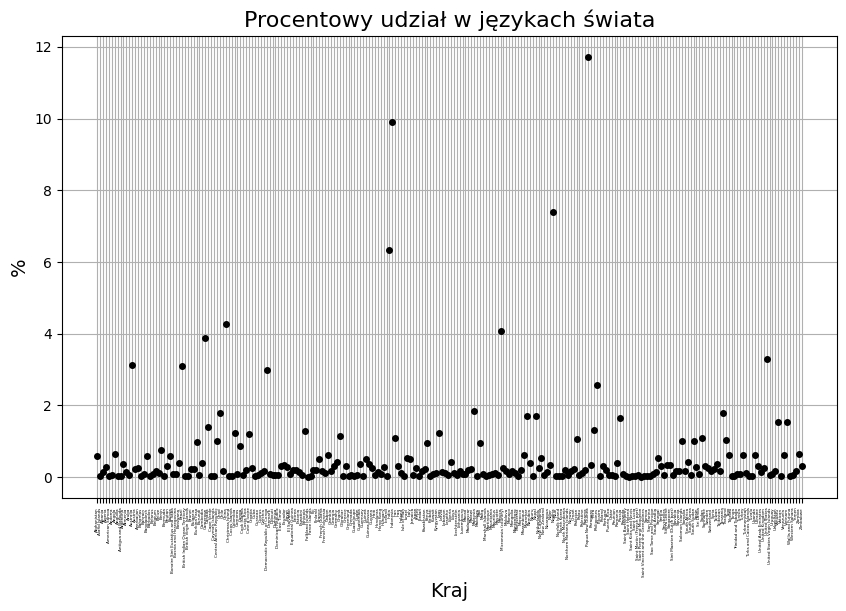

<Figure size 640x480 with 0 Axes>

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(df1['Kraje'], df1['%'], marker='o', color='black', linestyle='None',markersize = 4)
plt.title('Procentowy udział w językach świata', fontsize=16)
plt.xlabel('Kraj', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=90,fontsize=3)  
plt.show()
plt.savefig('Procentowy udział w językach świata.png')

In [110]:
kraje = ['Poland','Germany', 'Spain', 'France', 'Italy', 'England', 'Russia', 'Hungary', 'Finland']
Europa = df[df['Kraje'].isin(kraje)]
Europa

,Kraje,Rok,Liczba żywych języków
78,Finland,2024,15
79,France,2024,36
85,Germany,2024,30
101,Hungary,2024,20
110,Italy,2024,36
178,Poland,2024,23
184,Russia,2024,119
211,Spain,2024,20


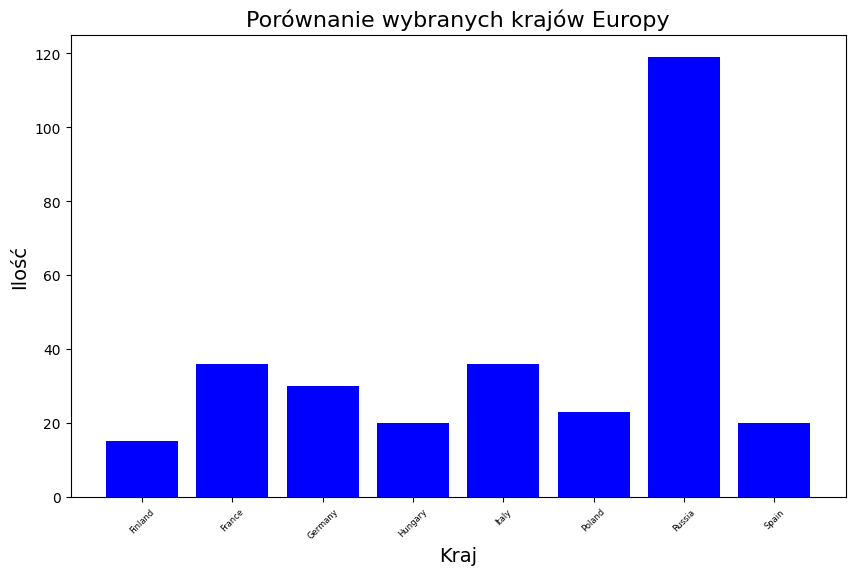

<Figure size 640x480 with 0 Axes>

In [133]:
plt.figure(figsize=(10, 6))
plt.bar(Europa['Kraje'], Europa['Liczba żywych języków'], color='blue')
plt.title('Porównanie wybranych krajów Europy', fontsize=16)
plt.xlabel('Kraj', fontsize=14)
plt.ylabel('Ilość', fontsize=14)
plt.grid(False)  
plt.xticks(rotation=45,fontsize=6)  
plt.show()
plt.savefig('Porównanie wybranych krajów Europy.png')

In [137]:
kontynety = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica']
dfk = df[df['Kraje'].isin(kontynety)]
dfk

,Kraje,Rok,Liczba żywych języków
1,Africa,2024,2195
13,Asia,2024,2368
74,Europe,2024,329
162,North America,2024,652
167,Oceania,2024,1339
208,South America,2024,484


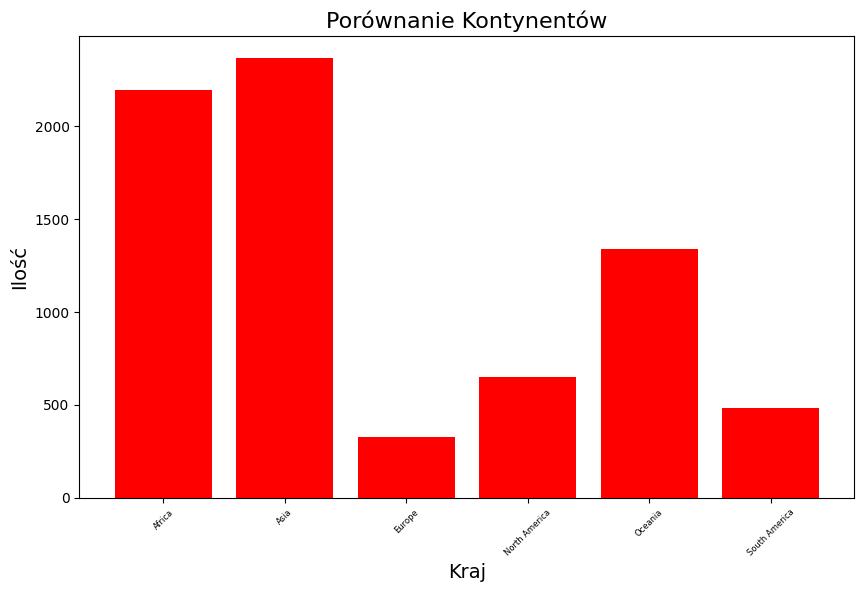

<Figure size 640x480 with 0 Axes>

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(dfk['Kraje'], dfk['Liczba żywych języków'], color='red')
plt.title('Porównanie Kontynentów', fontsize=16)
plt.xlabel('Kraj', fontsize=14)
plt.ylabel('Ilość', fontsize=14)
plt.grid(False)  
plt.xticks(rotation=45,fontsize=6)  
plt.show()
plt.savefig('Porównanie Kontynentów.png')

In [140]:
kontynety = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica', 'World']
df25 = df[df['Kraje'].isin(kontynety) == False]

In [142]:
top = df25.nlargest(10, 'Liczba żywych języków')
top

,Kraje,Rok,Liczba żywych języków
173,Papua New Guinea,2024,840
104,Indonesia,2024,710
159,Nigeria,2024,530
103,India,2024,453
46,China,2024,306
141,Mexico,2024,293
39,Cameroon,2024,279
235,United States,2024,236
14,Australia,2024,224
31,Brazil,2024,222


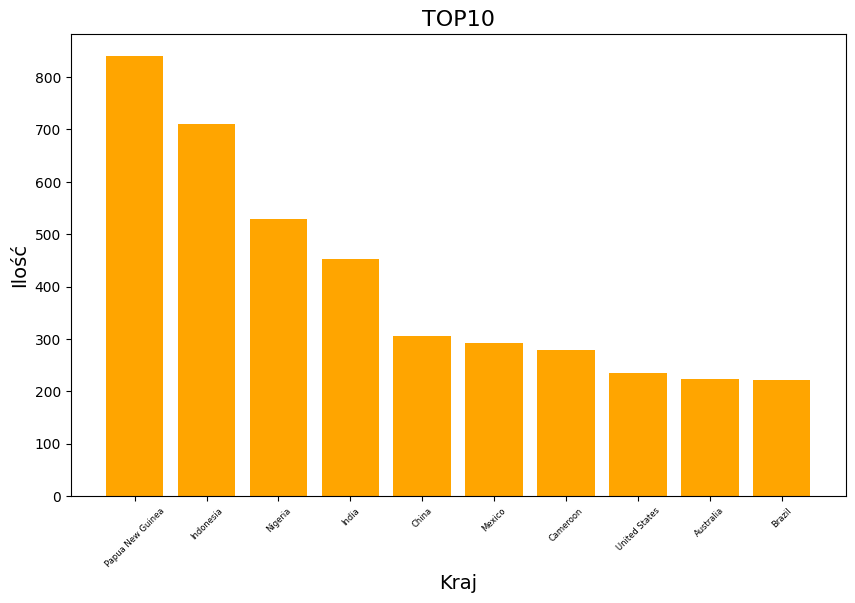

<Figure size 640x480 with 0 Axes>

In [143]:
plt.figure(figsize=(10, 6))
plt.bar(top['Kraje'], top['Liczba żywych języków'], color='orange')
plt.title('TOP10', fontsize=16)
plt.xlabel('Kraj', fontsize=14)
plt.ylabel('Ilość', fontsize=14)
plt.grid(False)  
plt.xticks(rotation=45,fontsize=6)  
plt.show()
plt.savefig('TOP10.png')

In [145]:

bot = df25.nsmallest(10, 'Liczba żywych języków')
bot

,Kraje,Rok,Liczba żywych języków
75,Falkland Islands,2024,1
187,Saint Helena,2024,1
191,Saint Pierre and Miquelon,2024,1
5,American Samoa,2024,2
8,Anguilla,2024,2
9,Antigua and Barbuda,2024,2
25,Bermuda,2024,2
32,British Indian Ocean Territory,2024,2
41,Cape Verde,2024,2
42,Cayman Islands,2024,2


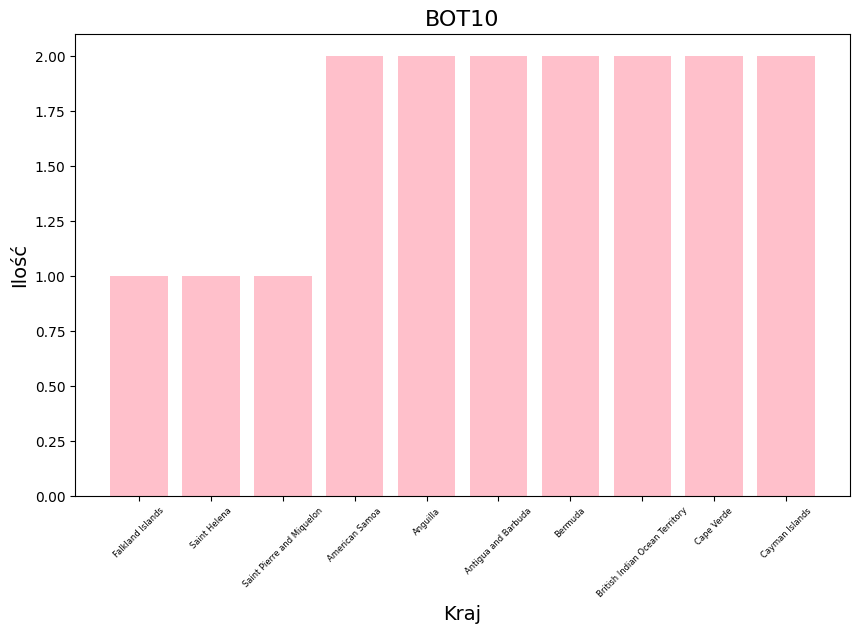

<Figure size 640x480 with 0 Axes>

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(bot['Kraje'], bot['Liczba żywych języków'], color='pink')
plt.title('BOT10', fontsize=16)
plt.xlabel('Kraj', fontsize=14)
plt.ylabel('Ilość', fontsize=14)
plt.grid(False)  
plt.xticks(rotation=45,fontsize=6)  
plt.show()
plt.savefig('BOT10.png')